In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as m
from scipy import stats 
import seaborn as s

In [2]:
a_Car_pricing= pd.read_csv(r"C:\Users\ganes\Downloads\daily-website-visitors.CSV")

In [3]:
a_Car_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         200 non-null    int64  
 1   symboling          200 non-null    int64  
 2   normalized-losses  164 non-null    float64
 3   make               200 non-null    object 
 4   fuel-type          200 non-null    object 
 5   aspiration         200 non-null    object 
 6   num-of-doors       198 non-null    object 
 7   body-style         200 non-null    object 
 8   drive-wheels       200 non-null    object 
 9   engine-location    200 non-null    object 
 10  wheel-base         200 non-null    float64
 11  length             200 non-null    float64
 12  width              200 non-null    float64
 13  height             200 non-null    float64
 14  curb-weight        200 non-null    int64  
 15  engine-type        200 non-null    object 
 16  num-of-cylinders   200 non

In [25]:
a_Car_pricing_pivot_list = a_Car_pricing[["price","drive-wheels","body-style"]]
a_Car_pricing_pivot_list_groupby= a_Car_pricing_pivot_list.groupby(["drive-wheels", "body-style"], as_index=False).agg({"price": sum})
a_pivot_view = a_Car_pricing_pivot_list_groupby.pivot(index="drive-wheels", columns="body-style", values="price")

print(a_pivot_view)

body-style    convertible   hardtop  hatchback     sedan     wagon
drive-wheels                                                      
4wd                   NaN       NaN     7603.0   37942.0   36383.0
fwd               11595.0    8249.0   411423.0  539649.0  119968.0
rwd              106253.0  169419.0   258080.0  781626.0  152948.0


C:\Users\ganes\AppData\Local\Temp\ipykernel_3516\3243431744.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  a_Car_pricing_pivot_list_groupby= a_Car_pricing_pivot_list.groupby(["drive-wheels", "body-style"], as_index=False).agg({"price": sum})


Text(0.5, 1.0, 'Price Distribution by Drive Wheels')

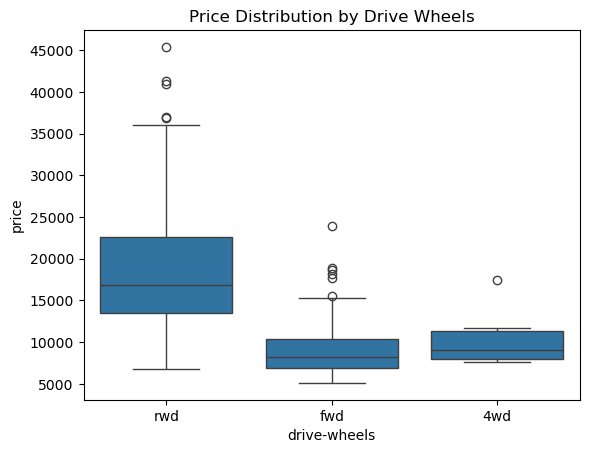

In [5]:
s.boxplot(x="drive-wheels",y="price", data=a_Car_pricing)
m.title("Price Distribution by Drive Wheels")

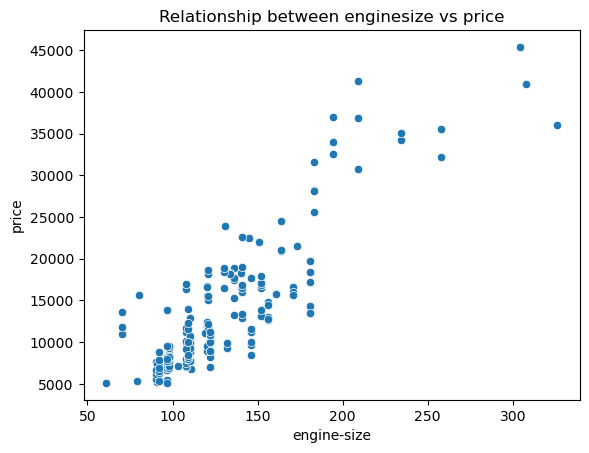

In [6]:
x= a_Car_pricing["engine-size"]
y=a_Car_pricing["price"]
s.scatterplot(x= a_Car_pricing["engine-size"], y=a_Car_pricing["price"])
m.title("Relationship between enginesize vs price")
m.show()


Here i am going to dealing with null values 

going to find the null values by each feture

In [7]:
a_Car_pricing= a_Car_pricing.rename(columns={"unnamed" :"row number"})

The following code helps identify and count null (missing) values in each column of the a_Car_pricing DataFrame

In [8]:
Null_values= a_Car_pricing.isnull()
for i in a_Car_pricing.columns.to_list():
    print(i)
    print("counting the null values",Null_values[i].value_counts())
    print('')

Unnamed: 0
counting the null values Unnamed: 0
False    200
Name: count, dtype: int64

symboling
counting the null values symboling
False    200
Name: count, dtype: int64

normalized-losses
counting the null values normalized-losses
False    164
True      36
Name: count, dtype: int64

make
counting the null values make
False    200
Name: count, dtype: int64

fuel-type
counting the null values fuel-type
False    200
Name: count, dtype: int64

aspiration
counting the null values aspiration
False    200
Name: count, dtype: int64

num-of-doors
counting the null values num-of-doors
False    198
True       2
Name: count, dtype: int64

body-style
counting the null values body-style
False    200
Name: count, dtype: int64

drive-wheels
counting the null values drive-wheels
False    200
Name: count, dtype: int64

engine-location
counting the null values engine-location
False    200
Name: count, dtype: int64

wheel-base
counting the null values wheel-base
False    200
Name: count, dtype: int64

l

This script helps validate numeric columns in a DataFrame (a_Car_pricing) by detecting non-numeric values, even if the column data type is supposed to be numeric.

In [9]:
numeric_col=a_Car_pricing.select_dtypes(include=["int64","float64"]).columns
for col in numeric_col:
    invalid_rows=pd.to_numeric(a_Car_pricing[col],errors= 'coerce').isnull() & a_Car_pricing[col].notnull()
    if invalid_rows.any():
        print(f"\Invalid (non-numeric) values found in '{col}':")
        print(a_Car_pricing.loc[invalid_rows,col])
    else:
         print(f"✅ All values in '{col}' are valid numbers.")

✅ All values in 'Unnamed: 0' are valid numbers.
✅ All values in 'symboling' are valid numbers.
✅ All values in 'normalized-losses' are valid numbers.
✅ All values in 'wheel-base' are valid numbers.
✅ All values in 'length' are valid numbers.
✅ All values in 'width' are valid numbers.
✅ All values in 'height' are valid numbers.
✅ All values in 'curb-weight' are valid numbers.
✅ All values in 'engine-size' are valid numbers.
✅ All values in 'bore' are valid numbers.
✅ All values in 'stroke' are valid numbers.
✅ All values in 'compression-ratio' are valid numbers.
✅ All values in 'horsepower' are valid numbers.
✅ All values in 'peak-rpm' are valid numbers.
✅ All values in 'city-mpg' are valid numbers.
✅ All values in 'highway-mpg' are valid numbers.
✅ All values in 'price' are valid numbers.


<>:5: SyntaxWarning: invalid escape sequence '\I'
<>:5: SyntaxWarning: invalid escape sequence '\I'
C:\Users\ganes\AppData\Local\Temp\ipykernel_3516\2638461125.py:5: SyntaxWarning: invalid escape sequence '\I'
  print(f"\Invalid (non-numeric) values found in '{col}':")


This code snippet helps inspect the unique values present in all categorical columns of the a_Car_pricing DataFrame. It’s useful for data validation and cleaning, especially to catch issues like inconsistent labeling, typos, or unexpected categories

In [10]:
categorical_cols = a_Car_pricing.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    unique_values = a_Car_pricing[col].dropna().unique()
    print(f"\n🔎 Unique values in categorical column '{col}':")
    print(unique_values)

    suspicious = a_Car_pricing[col].str.contains(r'[\d@#%^&*]', na=False)
    if suspicious.any():
        print(f"⚠️ Suspicious entries found in '{col}':")
        print(a_Car_pricing.loc[suspicious, col])
    else:
        print(f"✅ No suspicious patterns found in '{col}'.")


🔎 Unique values in categorical column 'make':
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
✅ No suspicious patterns found in 'make'.

🔎 Unique values in categorical column 'fuel-type':
['gas' 'diesel']
✅ No suspicious patterns found in 'fuel-type'.

🔎 Unique values in categorical column 'aspiration':
['std' 'turbo']
✅ No suspicious patterns found in 'aspiration'.

🔎 Unique values in categorical column 'num-of-doors':
['two' 'four']
✅ No suspicious patterns found in 'num-of-doors'.

🔎 Unique values in categorical column 'body-style':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
✅ No suspicious patterns found in 'body-style'.

🔎 Unique values in categorical column 'drive-wheels':
['rwd' 'fwd' '4wd']
⚠️ Suspicious entries found in 'drive-wheels':
3      4wd
135    4wd
139    4wd
140    4wd
143    4wd
144    

check for null values 

In [11]:
print(a_Car_pricing.isnull().sum())

Unnamed: 0            0
symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


Filling Missing Values in Numeric Columns Using Median

This line of code handles missing values (NaN) in all numeric columns of the a_Car_pricing DataFrame by replacing them with their respective column medians

In [12]:
a_Car_pricing[numeric_col] = a_Car_pricing[numeric_col].fillna(a_Car_pricing[numeric_col].median())

Binning the price Column into Categories

To categorize the price values in the a_Car_pricing DataFrame, we use equal-width binning by dividing the range of prices into 3 groups: Low, Medium, and High.

In [13]:
bin = np.linspace(min(a_Car_pricing["price"]),max(a_Car_pricing["price"]),4)
group_names = ["Low","Medium","high"]
price_binned = pd.cut(a_Car_pricing["price"],bin, labels= group_names,include_lowest= True)
a_Car_pricing["price_binned"] = price_binned

Text(0.5, 1.0, 'price bin')

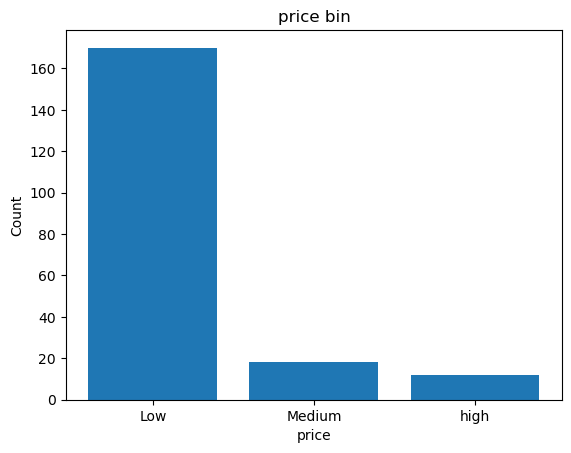

In [14]:
m.bar(group_names, a_Car_pricing["price_binned"].value_counts())
m.xlabel("price")
m.ylabel("Count")
m.title("price bin")

Scatter Plot with Regression Line

To visualize the relationship between engine size and price, we use Seaborn's regplot() to create a scatter plot with a regression line, and Matplotlib’s ylim() to set the y-axis starting from 0.

(0.0, 53372.241270308514)

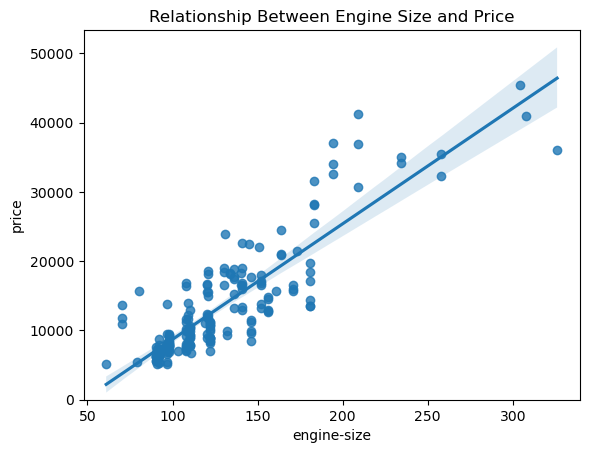

In [15]:
s.regplot(x=a_Car_pricing["engine-size"], y=a_Car_pricing["price"])
m.title("Relationship Between Engine Size and Price")
m.ylim(0,)

hecking Correlation Between engine-size and price

To understand how strongly the engine size and price are related, we compute the correlation coefficient using the .corr() method:

In [16]:
a_Car_pricing[["engine-size","price"]].corr

<bound method DataFrame.corr of      engine-size  price
0            130  16500
1            152  16500
2            109  13950
3            136  17450
4            136  15250
..           ...    ...
195          141  16845
196          141  19045
197          173  21485
198          145  22470
199          141  22625

[200 rows x 2 columns]>

Scatter Plot with Regression Line

To visualize the relationship between highway-mpg and price, we use Seaborn's regplot() to create a scatter plot with a regression line, and Matplotlib’s ylim() to set the y-axis starting from 0.

(0.0, 48185.2304432171)

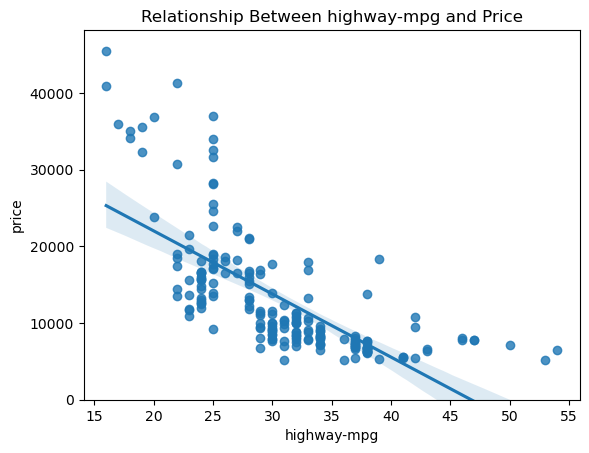

In [17]:
s.regplot(x=a_Car_pricing["highway-mpg"], y=a_Car_pricing["price"])
m.title("Relationship Between highway-mpg and Price")
m.ylim(0,)

In [18]:
a_Car_pricing[["highway-mpg","price"]].corr

<bound method DataFrame.corr of      highway-mpg  price
0             27  16500
1             26  16500
2             30  13950
3             22  17450
4             25  15250
..           ...    ...
195           28  16845
196           25  19045
197           23  21485
198           27  22470
199           25  22625

[200 rows x 2 columns]>

Scatter Plot with Regression Line

To visualize the relationship between peak-rpm and price, we use Seaborn's regplot() to create a scatter plot with a regression line, and Matplotlib’s ylim() to set the y-axis starting from 0.

(0.0, 47414.1)

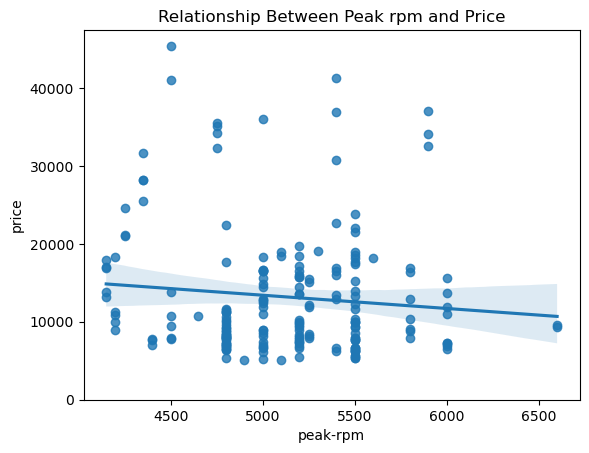

In [19]:
s.regplot(x=a_Car_pricing["peak-rpm"], y=a_Car_pricing["price"])
m.title("Relationship Between Peak rpm and Price")
m.ylim(0,)

In [20]:
a_Car_pricing[["peak-rpm","price"]].corr

<bound method DataFrame.corr of      peak-rpm  price
0      5000.0  16500
1      5000.0  16500
2      5500.0  13950
3      5500.0  17450
4      5500.0  15250
..        ...    ...
195    5400.0  16845
196    5300.0  19045
197    5500.0  21485
198    4800.0  22470
199    5400.0  22625

[200 rows x 2 columns]>

In [21]:
from scipy import stats 

 Pearson Correlation Coefficient between wheel-base and price

To statistically measure the strength and direction of the linear relationship between wheel-base and price, we use the Pearson correlation coefficient with SciPy:

In [22]:
pearson_coaf, p_value= stats.pearsonr(a_Car_pricing["wheel-base"],a_Car_pricing["price"])
print("the pearson coeeffient correaltion is ",pearson_coaf, "with p value of ", p_value)

the pearson coeeffient correaltion is  0.5891470005448702 with p value of  4.457019502050271e-20


 Pearson Correlation Coefficient between length and price

To statistically measure the strength and direction of the linear relationship between wheel-base and price, we use the Pearson correlation coefficient with SciPy:

In [23]:
pearson_coaf, p_value= stats.pearsonr(a_Car_pricing["length"],a_Car_pricing["price"])
print("the pearson coeeffient correaltion is ",pearson_coaf, "with p value of ", p_value)

the pearson coeeffient correaltion is  0.6910440897821906 with p value of  9.960963222347693e-30
